<a href="https://colab.research.google.com/github/POOJACH76/POOJACH76/blob/main/ACENE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir -p ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d nayanchaure/acne-dataset

 91% 153M/167M [00:01<00:00, 145MB/s]
100% 167M/167M [00:01<00:00, 130MB/s]


In [14]:
import zipfile

In [5]:
zip_ref= zipfile.ZipFile("/content/acne-dataset.zip",'r')
zip_ref.extractall('/content/Acne')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [7]:
acne_ds = keras.utils.image_dataset_from_directory(
    directory="/content/Acne",
    labels='inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)


Found 1832 files belonging to 1 classes.


In [10]:
image_data_dir = "/content/Acne"

datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
)

batch_size = 32
image_size = (256, 256)

train_ds = datagen.flow_from_directory(
    image_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42,
)

validation_ds = datagen.flow_from_directory(
    image_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False,
)

Found 1466 images belonging to 1 classes.
Found 366 images belonging to 1 classes.


In [18]:
def process (image,label):
  image= tf.cast(image/255. ,tf.float32)
  return image,label
  acne_ds= acne_ds.map(process)


In [19]:
from keras.models import Sequential
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [20]:
from keras.src.losses import binary_crossentropy
model.compile(optimizer='adam', loss=binary_crossentropy,metrics=['accuracy'])
model.fit(acne_ds,epochs=10)

Epoch 1/10
58/58 [==============================] - 10s 117ms/step - loss: 0.0015 - accuracy: 0.9995
Epoch 2/10
58/58 [==============================] - 8s 129ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 8s 114ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 8s 117ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 8s 128ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
58/58 [==============================] - 8s 119ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
58/58 [==============================] - 8s 122ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
58/58 [==============================] - 9s 133ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
58/58 [==============================] - 8s 116ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
58/58 [==============================] - 9s 140ms/step 

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


Epoch 1/10
58/58 [==============================] - 8s 131ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/10
58/58 [==============================] - 8s 120ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 8s 129ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 8s 120ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 8s 130ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
58/58 [==============================] - 8s 119ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
58/58 [==============================] - 9s 119ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
58/58 [==============================] - 11s 168ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
58/58 [==============================] - 8s 123ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
58/58 [==============================] - 8s 120ms/s

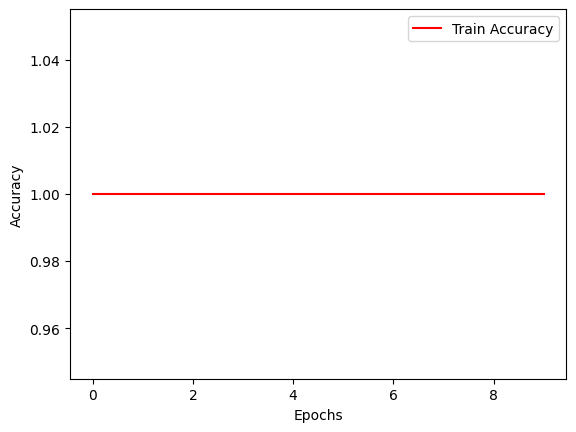

In [24]:
import matplotlib.pyplot as plt
history = model.fit(acne_ds, epochs=10)
plt.plot(history.history['accuracy'], color='red', label='acne_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
import cv2

In [48]:
test_img=cv2.imread('/content/WhatsApp Image 2023-06-10 at 2.58.52 PM.jpeg')

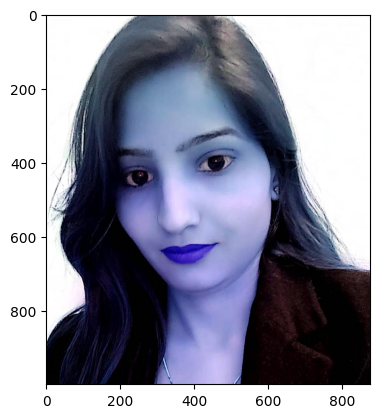

In [49]:
plt.imshow(test_img)

In [50]:
test_img.shape

(1000, 876, 3)

In [51]:
test_img=cv2.resize(test_img,(256,256))


In [52]:
test_input = test_img.reshape((1,256,256,3))


In [53]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

Found 1466 images belonging to 1 classes.
Found 366 images belonging to 1 classes.
Epoch 1/10
46/46 [==============================] - 9s 138ms/step - loss: 0.0150 - accuracy: 0.9939
Epoch 2/10
46/46 [==============================] - 8s 164ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
46/46 [==============================] - 7s 156ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
46/46 [==============================] - 7s 142ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
46/46 [==============================] - 8s 164ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
46/46 [==============================] - 7s 149ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
46/46 [==============================] - 7s 150ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
46/46 [==============================] - 8s 162ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
46/46 [==============================] - 7s 142ms/step - loss: 0.0000e+00 - ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


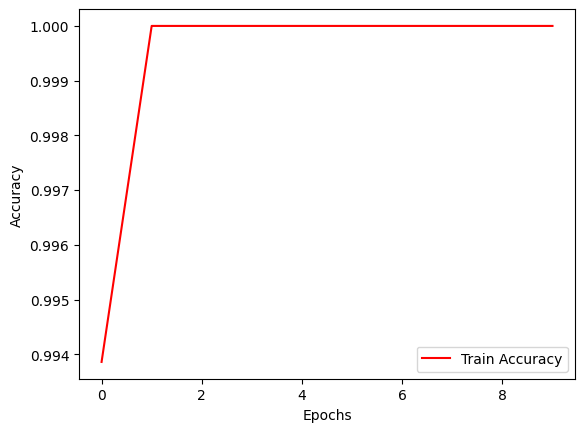

In [9]:
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Extract the dataset
zip_ref = zipfile.ZipFile("/content/acne-dataset.zip", 'r')
zip_ref.extractall('/content/Acne')
zip_ref.close()

# Define the image data directory
image_data_dir = "/content/Acne"

datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
)


batch_size = 32
image_size = (256, 256)


train_ds = datagen.flow_from_directory(
    image_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42,
)

# Create the validation dataset
validation_ds = datagen.flow_from_directory(
    image_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Use 'binary' for binary classification
    subset='validation',  # Specify 'validation' for the validation set
    shuffle=False,  # Do not shuffle the validation data
)

# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    layers.Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    layers.Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(train_ds, epochs=10)

# Predict on the validation data
validation_predictions = model.predict(validation_ds)
validation_true_labels = validation_ds.labels

# Define a custom threshold (e.g., 0.3)
custom_threshold = 0.3

# Apply the threshold to predictions
thresholded_predictions = (validation_predictions >= custom_threshold).astype(int)

# Calculate accuracy, precision, recall, and confusion matrix with the adjusted threshold
validation_accuracy = accuracy_score(validation_true_labels, thresholded_predictions)
validation_precision = precision_score(validation_true_labels, thresholded_predictions)
validation_recall = recall_score(validation_true_labels, thresholded_predictions)
validation_confusion_matrix = confusion_matrix(validation_true_labels, thresholded_predictions)

# Print results
print("Validation Accuracy:", validation_accuracy)
print("Validation Precision:", validation_precision)
print("Validation Recall:", validation_recall)
print("Validation Confusion Matrix:")
print(validation_confusion_matrix)

# Plot training accuracy
plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
